# In Class Lab 10 Template
# Cosmological Tools

In this lab you will create a Class called `CosmologicalTools` that will define various functions that are useful for defining cosmological quantities. We will be adding to this class in subsequent labs. 

For Lab 12, we will create functions that return the Hubble Parameter and the Density Parameters as a function of redshift. 



In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


# Part 1 :

A)
The first function of the class is called `HubbleParameter`.   From class:

$H(z)^2 = H_o^2 \Bigg [ \Omega_{m,o}(1+z)^3 + \Omega_{rad,o}(1+z)^4 + \Omega_{\Lambda,o} + \Omega_{K,o}(1+z)^2 \Bigg ] $

- Complete the initialization of the Class. 
- Complete the function to return H(z). 

B)
Check your code to make sure it returns the correct Hubble Parameter at z=0  of 67.81 km/s/Mpc

C) 
Determine the Hubble Parameter at z = 1 in the benchmark cosmology

D) The Einstein De Sitter cosmology refers to a time when normal matter dominated the energy budget. 
$\Omega_m = 1$ and all other density parameters are negligible (set to 0).

   -  Determine the Hubble Parameter at z=1 in the Einstein De Sitter Cosmology

   -   Is the recession velocity of a galaxy at a given distance expected to be larger or smaller than in the benchmark cosmology at z=1?

# Part 2:


## A) 

From class:

$\Omega_m(z) = \Omega_{m0} (1+z)^3 \Bigg (\frac{H_o}{H(z)} \Bigg )^2$


$\Omega_{rad}(z) = \Omega_{rad0}(1+z)^4\Bigg (\frac{H_o}{H(z)} \Bigg )^2$


$\Omega_\Lambda(z) = \Omega_{\Lambda 0}\Bigg (\frac{H_o}{H(z)} \Bigg )^2$


Complete the corresponding functions in the class

## B) 

Plot $\Omega_m$(z),  $\Omega_{rad}$(z) and $\Omega_{\Lambda}$(z) as a function of z using the benchmark cosmology.  

But plot the x values as (z+1).  

An array of redshifts has already been defined (zrange), starting from the future  (zmin = -0.9) to the past (zmax = 10$^5$).

## C) 

-  At what redshift does radiation dominate? This epoch is referred to as matter-radiation equality.
-  At what redshift does dark energy dominate?


In [2]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM0, OmegaR0, OmegaL0, h):
        """ initialize the instance of the class - for any given Cosmology
        
        PARAMETERS
        ----------
        OmegaM0: `float`
            the Matter density parameter at z=0
        
        OmegaR0: `float` 
            the radiation density parameter at z=0
        
        OmegaL0: `float`
            The dark energy density parameter at z=0
            
        h: `float` 
            the Normalization for the hubble parameter at z=0
        """
        
        
        # initialize the cosmology at z=0
        self.OmegaM0 = OmegaM0    ### Matter Density Parameter
        self.OmegaR0 = OmegaR0   ### Radiation Density Parameter
        self.OmegaL0 = OmegaL0   ### Dark Energy Density Parameter
        self.OmegaK0 =  1 - (OmegaM0 +OmegaR0 +OmegaL0)    #### Curvature Density Parameter
        
        self.h =  h  # Normalization of Hubble Parameter   
        self.Ho = self.h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameter(self, z):
        """  Method that defines the Hubble Parameter as a function of redshift
            H(z)^2 = H_o^2 [ OmegaM0(1+z)^3 + OmegaR0(1+z)^4 + OmegaLambda0 + OmegaK0(1+z)^2] 
        
        PARAMETERS
        ----------
            z: `float`
                redshift 
            
        RETURNS
        -------
            Hz: `float`
                The Hubble parameter at the given redshift in units of km/s/Mpc        
        """
        
        
        # FILL THIS IN 
        OmegaM = self.OmegaM0*(1+z)**3 #omega matter
        OmegaR = self.OmegaR0*(1+z)**4 #omega radiation
        OmegaL =self.OmegaL0 #Omega dark energy 
        OmegaK =self.OmegaK0 *(1+z)**2 #curative density 
        Hz= self.Ho*np.sqrt(OmegaK+OmegaR+OmegaL+OmegaM)
        
        return Hz
    
    
    # Question 2 A)
    def OmegaM_Z(self,z):
        """ Method that defines the matter density parameter as a function of redshift
        OmegaM0*(1+z)**3*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaM: `float or np.ndarray`
            Matter Density Parameter at the given redshift.
        """
        
        # FILL THIS IN
        OmegaM= self.OmegaM0*(1+z)**3*(self.Ho/self.HubbleParameter(z))**2
        return OmegaM
    
    def OmegaR_Z(self,z):
        """ Method that defines the radiation density parameter as a function of redshift
         OmegaR0*(1+z)**4*(Ho/Hz)^2
         
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaR: `float or np.ndarray`
            Radiation Density Parameter at the given redshift.
        """
        # FILL THIS IN
        OmegaR= self.OmegaR0*(1+z)**4*(self.Ho/self.HubbleParameter(z))**2
        return OmegaR
    
    
    def OmegaL_Z(self,z):
        """ Method that defines the dark energy density parameter as a function of redshift
        OmegaL0*(Ho/Hz)^2
        
        PARAMETERS
        ----------
        z  `float or np.ndarray`
            Redshift
        
        RETURNS
        -------
        OmegaL: `float or np.ndarray`
            Dark Energy Density Parameter at the given redshift.
        """
        # FILL THIS IN
        OmegaL= self.OmegaL0*(self.Ho/self.HubbleParameter(z))**2
        return OmegaL
    
    
    

In [3]:

# Define the benchmark cosmology at z =0
# Planck 2015 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc
  

In [4]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology
BenchMark=CosmologicalTools(OmegaM0_planck,OmegaR0_planck,OmegaL0_planck,h_planck)

In [5]:
# Question 1 B) 

# Test Hubble Parameter at z = 0
BenchMark.HubbleParameter(1)

<Quantity 120.48424622 km / (Mpc s)>

In [6]:
# Question 1 C) 

# Compute the Hubble Parameter at z = 1 in BenchMark Cosmology


In [7]:
# Question 1 D) 
# Define the cosmology for the Einstein De Sitter Universe
OmegaMD = 1 
OmegaRD = 0
OmegaLD = 0
# h is the same as in Benchmark Cosmology

In [8]:
# Define a New Instance of the Class with Einstein De Sitter Cosmology 
DeSitter = CosmologicalTools(OmegaMD, OmegaRD, OmegaLD, h_planck)


In [9]:
# Compute the Hubble Parameter at z = 1.0 in Einstein De Sitter Cosmology
DeSitter.HubbleParameter(1)

<Quantity 191.79564333 km / (Mpc s)>

Is the recession velocity of a galaxy at a given distance larger or smaller than in the benchmark cosmology at z=1?
Desitter is higher : v=H(z)*r


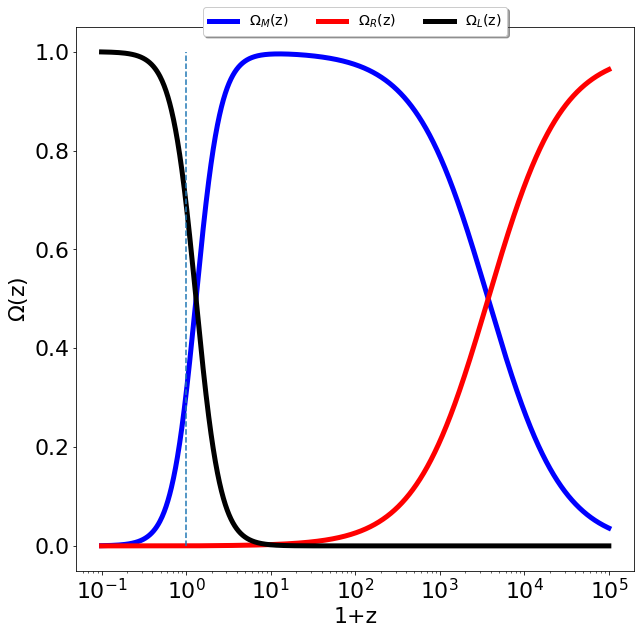

In [13]:
# Question 2 B) 


# Plot the Redshift Evolution of OmegaM, OmegaR and OmegaL
############################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Define an array of redshift 
zmax = 10**5
zmin = -0.9
zrange = np.arange(zmin, zmax, 0.01)
OmegaM_z=BenchMark.OmegaM_Z(zrange)
OmegaR_z=BenchMark.OmegaR_Z(zrange)
OmegaL_z=BenchMark.OmegaL_Z(zrange)
# Evolution of Matter Density Parameter as a function of 1+z
# FILL THIS IN
plt.semilogx(1+zrange,OmegaM_z  , color='blue', linewidth=5, label=r'$\Omega_M$(z)')

# Evolution of Radiation Density Parameter 
# FILL THIS IN 
plt.semilogx( 1+zrange,OmegaR_z , color='red', linewidth=5, label=r'$\Omega_R$(z)')

# Evolution of Dark Energy Density Parameter 
# FILL THIS IN
plt.semilogx( 1+zrange,OmegaL_z , color='black', linewidth=5, label=r'$\Omega_L$(z)')



plt.vlines(1,0,1,linestyle='--')
# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel(r'$\Omega$(z)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


legend = ax.legend(loc='upper center', fontsize='x-large', 
                   bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

# Save to a file
plt.savefig('Lab10_DensityParameterEvolution.png')

# Question 2 C) 

 At what approximate redshift does Radiation Density dominate?




In [15]:
idx= np.where(OmegaR_z>OmegaM_z)
zRad=zrange[idx[0][0]]
print(zRad)

3736.870000000003


 At what approximate redshift does Dark Energy dominate?   


In [16]:
idx= np.where(OmegaM_z>OmegaL_z)
zMatter=zrange[idx[0][0]]
print(zMatter)

0.31000000000000105
